# Importação das bibliotecas

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
#from ggplot import *
from sklearn import linear_model, datasets, metrics
from sklearn import svm
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Funções úteis

In [7]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99,
                        top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Carrega o Dataset

In [8]:
mnist = fetch_mldata("MNIST original")

# Pré-processamento

In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data / 255., mnist.target, test_size=0.20)
print('Utilizamos %d amostras para treinamento e %d amostras para teste' % (len(X_train), len(X_test)))

n_samples = mnist.data.shape[0]
n_features = mnist.data.shape[1]

target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print('numero de amostras total do dataset:', n_samples)
print('numero de features:', n_features)

n_components = 16

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

pca_numbers = pca.components_.reshape((n_components, 28, 28))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Utilizamos 56000 amostras para treinamento e 14000 amostras para teste
numero de amostras total do dataset: 70000
numero de features: 784


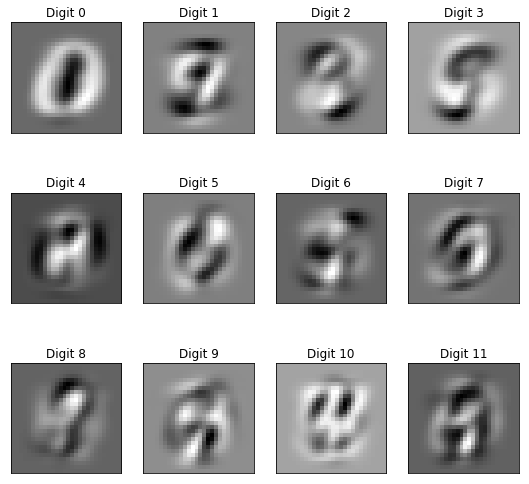

In [10]:
pcanumber_titles= []
for i in range(mnist.data.shape[0]):
    pcanumber_titles.append("Digit "+str(i))
 
plot_gallery(pca_numbers, pcanumber_titles, 28, 28)
 
plt.show()

# Treinamento utilizando o MLPClassifier

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(89,), activation='tanh', max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)
#activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

In [45]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Training set score WITHOUT pca: %f" % mlp.score(X_train, y_train))
print("Test set score WITHOUT pca: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.31032216
Iteration 2, loss = 0.15207168
Iteration 3, loss = 0.11059868
Iteration 4, loss = 0.08686078
Iteration 5, loss = 0.07143249
Iteration 6, loss = 0.05938503
Iteration 7, loss = 0.05122458
Iteration 8, loss = 0.04306196
Iteration 9, loss = 0.03705915
Iteration 10, loss = 0.03180612
Iteration 11, loss = 0.02753249
Iteration 12, loss = 0.02376474
Iteration 13, loss = 0.02064492
Iteration 14, loss = 0.01803107
Iteration 15, loss = 0.01579507
Iteration 16, loss = 0.01362228
Iteration 17, loss = 0.01212235
Iteration 18, loss = 0.01064153
Iteration 19, loss = 0.00954750
Iteration 20, loss = 0.00848149
Iteration 21, loss = 0.00770892
Iteration 22, loss = 0.00692291
Iteration 23, loss = 0.00626042
Iteration 24, loss = 0.00581721
Iteration 25, loss = 0.00531396
Iteration 26, loss = 0.00491804
Iteration 27, loss = 0.00458133
Iteration 28, loss = 0.00436730
Iteration 29, loss = 0.00410546
Iteration 30, loss = 0.00386134
Iteration 31, loss = 0.00367231
Iteration 32, los

In [46]:
mlp.fit(X_train_pca, y_train)
y_pred_pca = mlp.predict(X_test_pca)
print("Training set score WITH pca: %f" % mlp.score(X_train_pca, y_train))
print("Test set score WITH pca: %f" % mlp.score(X_test_pca, y_test))

Iteration 1, loss = 0.47597010
Iteration 2, loss = 0.27553808
Iteration 3, loss = 0.20661237
Iteration 4, loss = 0.17570460
Iteration 5, loss = 0.15698907
Iteration 6, loss = 0.14412227
Iteration 7, loss = 0.13595119
Iteration 8, loss = 0.12803037
Iteration 9, loss = 0.12246642
Iteration 10, loss = 0.11801112
Iteration 11, loss = 0.11435518
Iteration 12, loss = 0.11102220
Iteration 13, loss = 0.10858527
Iteration 14, loss = 0.10565898
Iteration 15, loss = 0.10327723
Iteration 16, loss = 0.10111979
Iteration 17, loss = 0.09956910
Iteration 18, loss = 0.09747862
Iteration 19, loss = 0.09617378
Iteration 20, loss = 0.09509492
Iteration 21, loss = 0.09355943
Iteration 22, loss = 0.09261489
Iteration 23, loss = 0.09070667
Iteration 24, loss = 0.08952057
Iteration 25, loss = 0.08870579
Iteration 26, loss = 0.08712377
Iteration 27, loss = 0.08702038
Iteration 28, loss = 0.08586066
Iteration 29, loss = 0.08389772
Iteration 30, loss = 0.08364045
Iteration 31, loss = 0.08281232
Iteration 32, los

# Avaliação

In [47]:
print('Classification Report without using pca')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report without using pca
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1403
          1       0.99      0.99      0.99      1574
          2       0.96      0.98      0.97      1361
          3       0.98      0.96      0.97      1454
          4       0.98      0.98      0.98      1326
          5       0.97      0.97      0.97      1255
          6       0.98      0.99      0.98      1371
          7       0.98      0.98      0.98      1464
          8       0.96      0.96      0.96      1351
          9       0.97      0.97      0.97      1441

avg / total       0.98      0.98      0.98     14000



In [48]:
print('Classification Report using pca')
print(classification_report(y_test, y_pred_pca, target_names=target_names))

Classification Report using pca
             precision    recall  f1-score   support

          0       0.97      0.98      0.98      1403
          1       0.98      0.99      0.99      1574
          2       0.95      0.96      0.96      1361
          3       0.96      0.93      0.94      1454
          4       0.96      0.96      0.96      1326
          5       0.96      0.95      0.95      1255
          6       0.97      0.98      0.97      1371
          7       0.96      0.96      0.96      1464
          8       0.94      0.94      0.94      1351
          9       0.93      0.94      0.93      1441

avg / total       0.96      0.96      0.96     14000



In [49]:
print('Validação cruzada do treinamento sem a utilização do PCA')
scores = cross_val_score(mlp,X_train,y_train)
np.mean(scores)

Validação cruzada do treinamento sem a utilização do PCA
Iteration 1, loss = 0.36295318
Iteration 2, loss = 0.18725090
Iteration 3, loss = 0.13712885
Iteration 4, loss = 0.10735307
Iteration 5, loss = 0.08880382
Iteration 6, loss = 0.07407731
Iteration 7, loss = 0.06289353
Iteration 8, loss = 0.05323720
Iteration 9, loss = 0.04592737
Iteration 10, loss = 0.03943217
Iteration 11, loss = 0.03429402
Iteration 12, loss = 0.02925407
Iteration 13, loss = 0.02551846
Iteration 14, loss = 0.02186453
Iteration 15, loss = 0.01939984
Iteration 16, loss = 0.01725456
Iteration 17, loss = 0.01505259
Iteration 18, loss = 0.01322494
Iteration 19, loss = 0.01167618
Iteration 20, loss = 0.01060813
Iteration 21, loss = 0.00955805
Iteration 22, loss = 0.00857096
Iteration 23, loss = 0.00789553
Iteration 24, loss = 0.00719844
Iteration 25, loss = 0.00660903
Iteration 26, loss = 0.00624172
Iteration 27, loss = 0.00572678
Iteration 28, loss = 0.00539681
Iteration 29, loss = 0.00497422
Iteration 30, loss = 0.0

Iteration 50, loss = 0.00213771
Iteration 51, loss = 0.00208917
Iteration 52, loss = 0.00204032
Iteration 53, loss = 0.00200173
Iteration 54, loss = 0.00196072
Iteration 55, loss = 0.00191376
Iteration 56, loss = 0.00187170
Iteration 57, loss = 0.00184737
Iteration 58, loss = 0.00180108
Iteration 59, loss = 0.00177229
Iteration 60, loss = 0.00173929
Iteration 61, loss = 0.00170386
Iteration 62, loss = 0.00167811
Iteration 63, loss = 0.00164815
Iteration 64, loss = 0.00161944
Iteration 65, loss = 0.00159057
Iteration 66, loss = 0.00156545
Iteration 67, loss = 0.00154443
Iteration 68, loss = 0.00152200
Iteration 69, loss = 0.00149521
Iteration 70, loss = 0.00147625
Iteration 71, loss = 0.00145930
Iteration 72, loss = 0.00143764
Iteration 73, loss = 0.00141622
Iteration 74, loss = 0.00139568
Iteration 75, loss = 0.00137882
Iteration 76, loss = 0.00135943
Iteration 77, loss = 0.00134468
Iteration 78, loss = 0.00132575
Iteration 79, loss = 0.00131290
Iteration 80, loss = 0.00129581
Iteratio

0.97230352422234478

In [50]:
metrics.accuracy_score(y_test,y_pred)

0.97585714285714287

In [51]:
print('Validação cruzada do treinamento utilizando PCA para fazer o redimencionamento das imagens')
scores = cross_val_score(mlp,X_train_pca,y_train)
np.mean(scores)

Validação cruzada do treinamento utilizando PCA para fazer o redimencionamento das imagens
Iteration 1, loss = 0.52776568
Iteration 2, loss = 0.33775235
Iteration 3, loss = 0.25645380
Iteration 4, loss = 0.21202017
Iteration 5, loss = 0.18559166
Iteration 6, loss = 0.16782606
Iteration 7, loss = 0.15566921
Iteration 8, loss = 0.14525291
Iteration 9, loss = 0.13775549
Iteration 10, loss = 0.13123760
Iteration 11, loss = 0.12489411
Iteration 12, loss = 0.12059306
Iteration 13, loss = 0.11659855
Iteration 14, loss = 0.11407488
Iteration 15, loss = 0.11033524
Iteration 16, loss = 0.10772699
Iteration 17, loss = 0.10404612
Iteration 18, loss = 0.10135042
Iteration 19, loss = 0.09945791
Iteration 20, loss = 0.09677847
Iteration 21, loss = 0.09511981
Iteration 22, loss = 0.09384707
Iteration 23, loss = 0.09181707
Iteration 24, loss = 0.09014078
Iteration 25, loss = 0.08881886
Iteration 26, loss = 0.08734575
Iteration 27, loss = 0.08512577
Iteration 28, loss = 0.08467688
Iteration 29, loss = 0

Iteration 22, loss = 0.09332596
Iteration 23, loss = 0.09143669
Iteration 24, loss = 0.08936949
Iteration 25, loss = 0.08741458
Iteration 26, loss = 0.08651237
Iteration 27, loss = 0.08544186
Iteration 28, loss = 0.08344568
Iteration 29, loss = 0.08292403
Iteration 30, loss = 0.08104038
Iteration 31, loss = 0.08087515
Iteration 32, loss = 0.07942416
Iteration 33, loss = 0.07898207
Iteration 34, loss = 0.07791143
Iteration 35, loss = 0.07669972
Iteration 36, loss = 0.07604529
Iteration 37, loss = 0.07537275
Iteration 38, loss = 0.07425266
Iteration 39, loss = 0.07325537
Iteration 40, loss = 0.07278021
Iteration 41, loss = 0.07207353
Iteration 42, loss = 0.07153561
Iteration 43, loss = 0.07032840
Iteration 44, loss = 0.07018182
Iteration 45, loss = 0.06922500
Iteration 46, loss = 0.06875317
Iteration 47, loss = 0.06833862
Iteration 48, loss = 0.06814342
Iteration 49, loss = 0.06713954
Iteration 50, loss = 0.06646555
Iteration 51, loss = 0.06624222
Iteration 52, loss = 0.06605816
Iteratio

0.95401794874220303

In [52]:
metrics.accuracy_score(y_test,y_pred_pca)

0.95871428571428574

In [53]:
y_pred_pca[:50]

array([ 9.,  7.,  7.,  5.,  3.,  1.,  1.,  1.,  9.,  5.,  3.,  5.,  6.,
        9.,  6.,  8.,  3.,  0.,  3.,  4.,  6.,  3.,  5.,  8.,  3.,  4.,
        1.,  3.,  6.,  2.,  3.,  1.,  9.,  3.,  8.,  3.,  7.,  0.,  5.,
        8.,  4.,  0.,  5.,  3.,  0.,  5.,  2.,  3.,  8.,  7.])

In [54]:
y_pred[:50]

array([ 9.,  7.,  7.,  5.,  3.,  1.,  1.,  1.,  9.,  5.,  3.,  5.,  6.,
        9.,  6.,  8.,  3.,  0.,  8.,  4.,  6.,  3.,  5.,  8.,  3.,  4.,
        1.,  3.,  6.,  2.,  3.,  1.,  9.,  3.,  8.,  3.,  7.,  0.,  5.,
        8.,  4.,  0.,  5.,  3.,  0.,  5.,  2.,  3.,  8.,  7.])

In [55]:
y_test[:50]

array([ 9.,  7.,  7.,  5.,  3.,  1.,  1.,  1.,  9.,  5.,  3.,  5.,  6.,
        9.,  6.,  8.,  3.,  0.,  8.,  4.,  6.,  3.,  5.,  8.,  3.,  4.,
        1.,  3.,  6.,  2.,  3.,  1.,  9.,  3.,  8.,  3.,  7.,  0.,  5.,
        8.,  4.,  0.,  5.,  3.,  0.,  5.,  2.,  3.,  8.,  7.])

# Treinamento utilizando o modelo MLPClassifier com outros parametros

In [56]:
mlp2 = MLPClassifier(hidden_layer_sizes=(89,), activation='relu', max_iter=1000, alpha=1e-4,
                    solver='lbfgs', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

In [57]:
mlp2.fit(X_train_pca, y_train)
y_pred_pca2 = mlp2.predict(X_test_pca)
print("Training set score WITH pca: %f" % mlp2.score(X_train_pca, y_train))
print("Test set score WITH pca: %f" % mlp2.score(X_test_pca, y_test))

Training set score WITH pca: 0.988482
Test set score WITH pca: 0.958571


# Avaliação

In [58]:
print('Classification Report using pca')
print(classification_report(y_test, y_pred_pca2, target_names=target_names))

Classification Report using pca
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1403
          1       0.98      0.99      0.98      1574
          2       0.95      0.96      0.95      1361
          3       0.96      0.93      0.94      1454
          4       0.96      0.96      0.96      1326
          5       0.95      0.96      0.95      1255
          6       0.97      0.98      0.98      1371
          7       0.96      0.95      0.96      1464
          8       0.93      0.95      0.94      1351
          9       0.93      0.93      0.93      1441

avg / total       0.96      0.96      0.96     14000



# Validação Cruzada

In [40]:
print('Validação cruzada do treinamento com a utilização do PCA')
scores = cross_val_score(mlp2,X_train_pca,y_train)
np.mean(scores)

Validação cruzada do treinamento com a utilização do PCA


0.94712504337654424

In [59]:
metrics.accuracy_score(y_test,y_pred_pca2)

0.95857142857142852